In [1]:
import tl_simplification.ltl as LTL
from tl_simplification.simplification.predicate_checker import PredicateChecker
from tl_simplification.utils.int_set import IntegerSet
from tl_simplification.interval_simplification import interval_simplification
from tl_simplification.utils.spot import *

### Build a LTL Formula

In [2]:
exp = LTL.always(
    LTL.implies(
    LTL.pred("a", [])
    ,LTL.next(LTL._or(LTL.pred("b", []),LTL.pred("c", []))))
    )
print(exp)

(G((a -> (X((b | c))))))


### Implement a PredicateChecker class
In our case:
- "a" is true in [0,10]
- "b" is true in [5,15]

In [3]:
class TestChecker(PredicateChecker):

    def __init__(self):
        super().__init__()
        self.add_predicate("a", TestChecker.interval_a, 0)
        self.add_predicate("b", TestChecker.interval_b, 0)

    def interval_a(input):
        
        I_true = IntegerSet.from_interval([0,10])
        I_false = IntegerSet.empty()

        return I_true, I_false

    def interval_b(input):
        I_true = IntegerSet.from_interval([5,15])
        I_false = IntegerSet.empty()
        return I_true, I_false

### Interval Simplification
input:
- exp   : input formula
- I     : set that holds the trace positions at which this formula should be simplified. In our case [0]
- pc    : Predicate checker, defined above

returns:
- S     : simplification mapping of our specified positions (I) to simplified formulas

In [4]:
I = IntegerSet([0], False)
pc = TestChecker()

simp_exp = interval_simplification(exp, I, pc).get_at_timestep(0)

print(simp_exp)

((G[0,3]((X((b | c))))) & (G[15,inf](((!(a)) | (X((b | c)))))))


### Büchi Automata

Büchi Automata of original formula


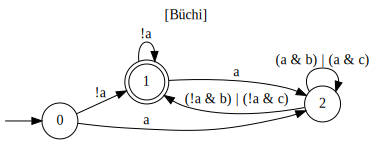

In [5]:
print("Büchi Automata of original formula")
to_buechi(exp)

Büchi Automata of simplified formula


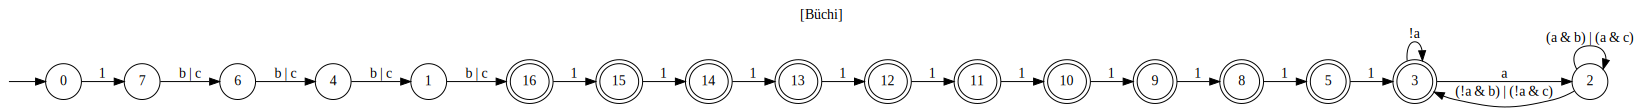

In [6]:
print("Büchi Automata of simplified formula")
to_buechi(simp_exp)